# Introduction to PyTorch

In [30]:
%pylab inline
import seaborn as sns
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 24

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dtype']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load data

In [12]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

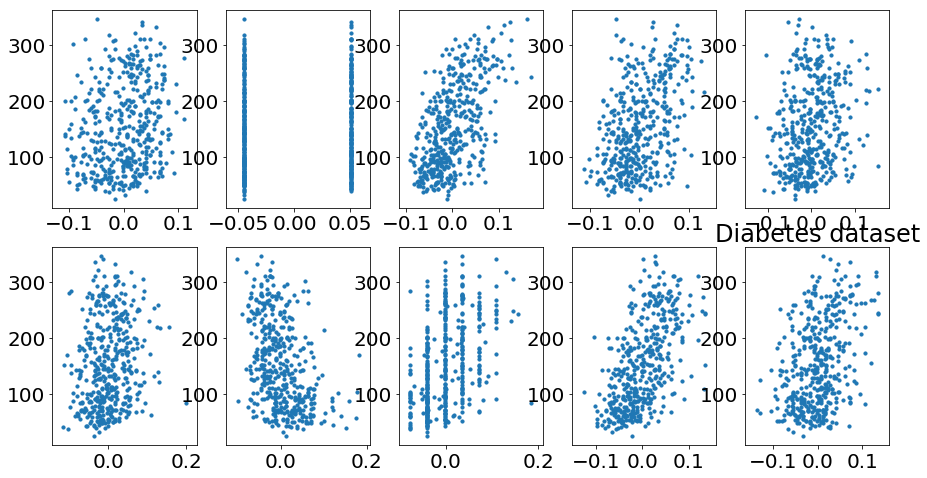

In [36]:
data_input = data['data']
data_output = np.atleast_2d(data['target']).T

# plot random input output
input_size = data_input.shape[1]
plt.figure(figsize=(15,8))

for i in range(input_size):
    plt.subplot(2,5,i+1)
    plt.scatter(data_input[:,i],data_output,s=10)

## Begin with numpy code

In [47]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.


# Create random input and output data
#x = np.random.randn(N, D_in)
#y = np.random.randn(N, D_out)

x = data_input
y = data_output

N,D_in = x.shape
D_out = y.shape[1]
H = 100

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

## Visualise the neural network

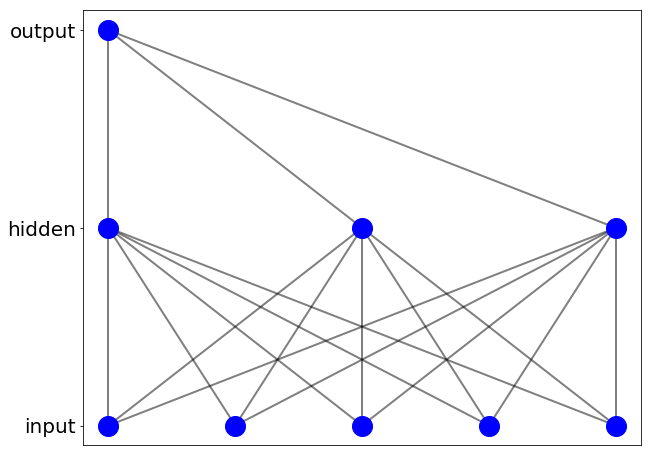

In [48]:

def visualise_nn():
    plt.figure(figsize=(10,8))
    D_in = 5
    D_out = 1
    H = 3
    input_line = 0.
    output_line = 1.
    hidden_line = 0.5
    
    def draw_lines(x1s,x2s,y1s,y2s):
        for x1,y1 in zip(x1s,y1s):
            for x2,y2 in zip(x2s,y2s):
                plt.plot([x1,x2],[y1,y2],'k-',lw=2,alpha=.5)

    x = np.linspace(0,1,num=D_in)
    x_y = input_line*np.ones(x.shape)
    
        
    h = np.linspace(0,1,num=H)
    h_y = hidden_line*np.ones(h.shape)
    
    
    draw_lines(x,h,x_y,h_y)
    
    y = np.linspace(0,1,num=D_out)
    y_y = output_line*np.ones(y.shape)
    
    
    draw_lines(h,y,h_y,y_y)
    
    plt.plot(x,x_y,'bo',ms=20.)
    plt.plot(h,h_y,'bo',ms=20.)
    plt.plot(y,y_y,'bo',ms=20.)
    
    plt.yticks([input_line,hidden_line,output_line],['input','hidden','output'])
    plt.xticks([],[])
    
visualise_nn()

## Back-propagation: brief summary
Loss function looks like
$$\sum (\mathbf{y^p} - \mathbf{y})^2$$
So the derivative w.r.t. $\mathbf{y^p}$ is
$$2 \sum (\mathbf{y^p} - \mathbf{y})$$

Our model take it input $\mathbf{x}$, performs a dot product with matrix $W_1$, then applies a non linear (RELU) function and then applies another dot product with $W_2$. Together this looks like

$$\mathbf{h} = W_1\mathbf{x}$$
$$\mathbf{h^r} = \sigma(\mathbf{h})$$
$$\mathbf{y^p} = W_2\mathbf{h^r}$$

Error graident of $W_2$ is therefore
$$\mathbf{h^r}^T\frac{\partial l}{\partial \mathbf{y^p}}$$

Gradient of RELU is easy to calculate. Remeber RELU $\sigma$ defined as
$$\sigma(x) = \begin{cases} 
      0 & x\leq 0 \\
      x & x \gt 0 
   \end{cases}
   $$
   
The derivative wrt $x$ then is just

$$\frac{\partial \sigma}{\partial x} = \begin{cases} 
      0 & x\leq 0 \\
      1 & x \gt 0 
   \end{cases}
   $$

In [49]:
results = []
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    results.append((t, loss))

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

In [50]:
def plot_loss(results):
    results = np.array(results)
    plt.figure(figsize=(10,8))
    plt.plot(results[:,0],results[:,1],'k-',lw=2);
    plt.yscale('log');

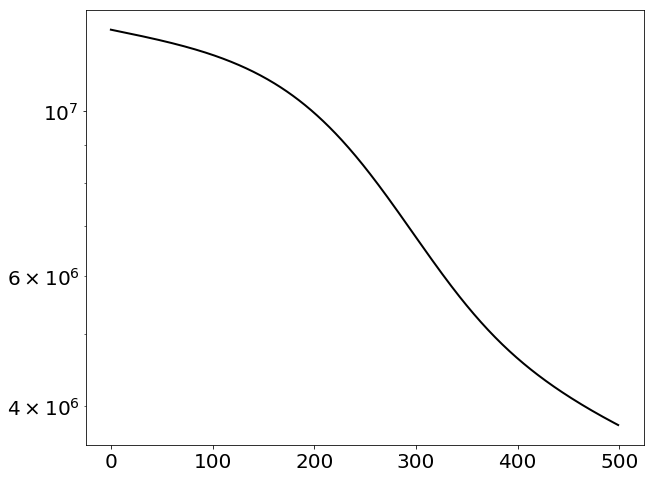

In [51]:
plot_loss(results)

In [44]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor

In [75]:
N,D_in = data_input.shape
D_out = data_output.shape[1]
H = 100

# Create random input and output data
#x = torch.randn(N, D_in).type(dtype)
#y = torch.randn(N, D_out).type(dtype)
x = torch.from_numpy(data_input).type(dtype)
y = torch.from_numpy(data_output).type(dtype)


# Randomly initialize weights
w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6


In [76]:
results = []
for t in range(1000):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    results.append((t, loss))

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

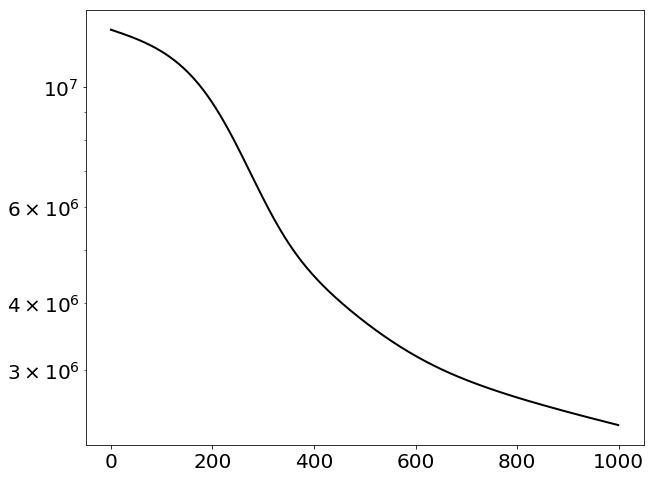

In [77]:
plot_loss(results)

## Inspect weights of neural network

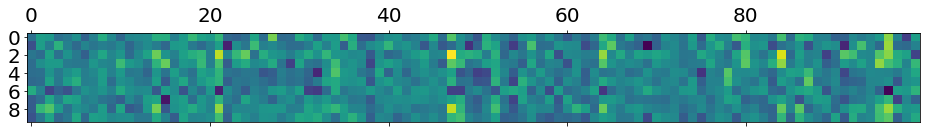

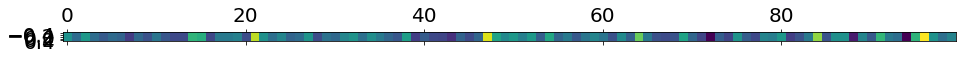

In [79]:
plt.figure(figsize=(10,20));
plt.matshow(w1.numpy());
plt.matshow(w2.numpy().T);

# Automated backpropagation in PyTorch

Manually calculating the form of differentiation for each weight in the neural network would quickly become challenging. Instead, as PyTorch can construct a dynamic graph and so knows the structure of the network, we can use automated differntiation tools to easily accomplish this

We wrap our `PyTorch` Tensors in Variable objects; a Variable represents a node in a computational graph. If `x` is a Variable then `x.data` is a Tensor, and `x.grad` is another Variable holding the gradient of `x` with respect to some scalar value.

In [57]:


# Create random Tensors to hold input and outputs, and wrap them in Variables.
# Setting requires_grad=False indicates that we do not need to compute gradients
x = Variable(torch.from_numpy(data_input).type(dtype), requires_grad=False)
y = Variable(torch.from_numpy(data_output).type(dtype), requires_grad=False)

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
results = []
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    results.append((t, loss.data[0]))

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w1.grad and w2.grad will be Variables holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

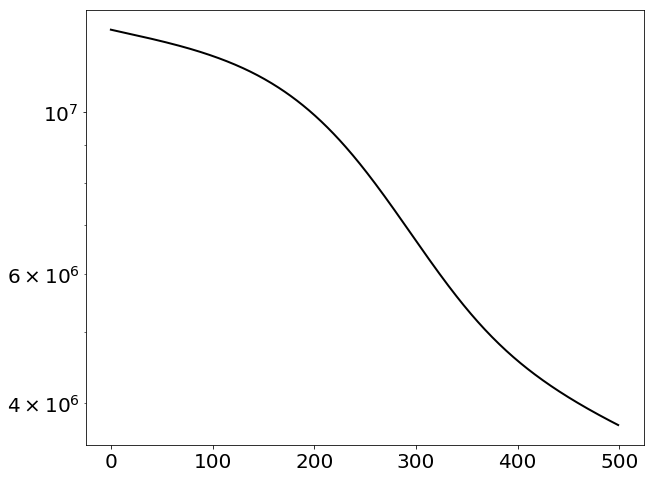

In [58]:
plot_loss(results)

# Neural network package
It's slightly hard to think write a larger nn in this way. That's why PyTorch has the `nn` package

In [59]:

x = Variable(torch.from_numpy(data_input).type(dtype))
y = Variable(torch.from_numpy(data_output).type(dtype), requires_grad=False)


In [60]:

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)


In [61]:

# The nn package also contains definitions of popular loss functions
loss_fn = torch.nn.MSELoss(size_average=False)


In [62]:
results = []
learning_rate = 1e-4
for t in range(500):
    # Forward pass
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    results.append((t, loss.data[0]))

    # Zero the gradients
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. 
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data
        

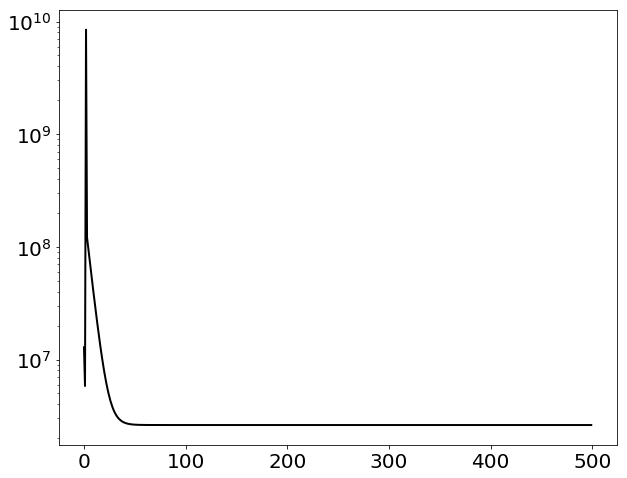

In [63]:
plot_loss(results)

# Using a general optimizer

In [64]:

x = Variable(torch.from_numpy(data_input).type(dtype))
y = Variable(torch.from_numpy(data_output).type(dtype), requires_grad=False)


In [65]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

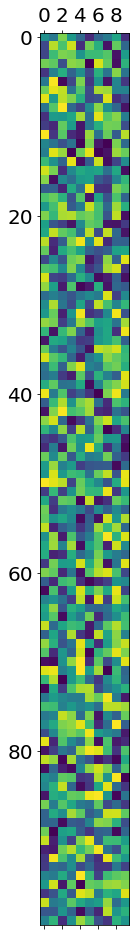

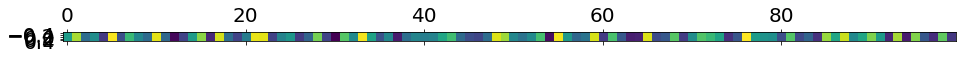

In [66]:
# linear contains both matrix weights and bias term
l = model[0]
weights = [np.atleast_2d(p.data.numpy()) for p in l.parameters()]

for w in weights: plt.matshow(w)

In [71]:

# The nn package also contains definitions of popular loss functions
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [72]:
results = []

for t in range(500):
    # Forward pass
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    results.append((t, loss.data[0]))

    # Zero the gradients
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. 
    loss.backward()

    # optimize
    optimizer.step()
    
    

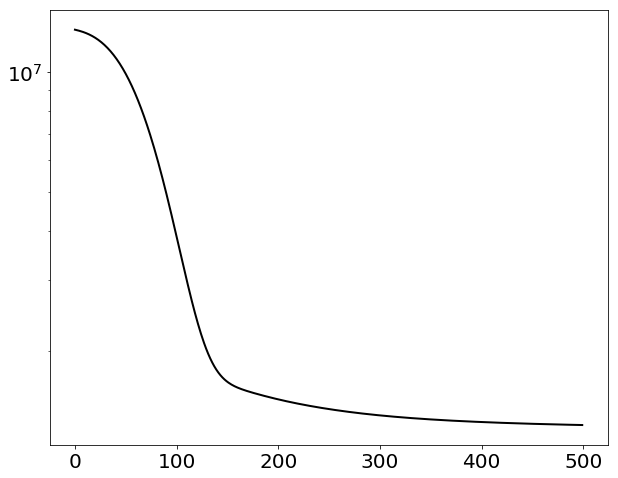

In [73]:
plot_loss(results)

# Autoencoders

![picture of autoencoder](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

In [80]:
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image



In [121]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 5
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = MNIST('./data', transform=img_transform,download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)




In [122]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28 * 28), 
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)



In [123]:
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img)
        # ===================forward=====================
        output = model(img)
        loss = loss_function(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))
    if epoch % 10 == 0:
        pass
        #pic = to_img(output.cpu().data)
        #plt.figure()
        #plt.imshow(pic)
        #save_image(pic, './mlp_img/image_{}.png'.format(epoch))

#torch.save(model.state_dict(), './sim_autoencoder.pth')

epoch [1/5], loss:0.2015
epoch [2/5], loss:0.1903
epoch [3/5], loss:0.1889
epoch [4/5], loss:0.1816
epoch [5/5], loss:0.1805


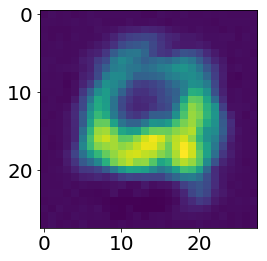

In [124]:
z = np.atleast_2d(np.array([0.,0.]))
#.type(torch.DoubleTensor)
out = model.decoder(Variable(torch.from_numpy(z)).float())
out = to_img(out).data.numpy()
plt.imshow(out[0,0,:,:])

In [125]:
from mpl_toolkits.axes_grid1 import AxesGrid

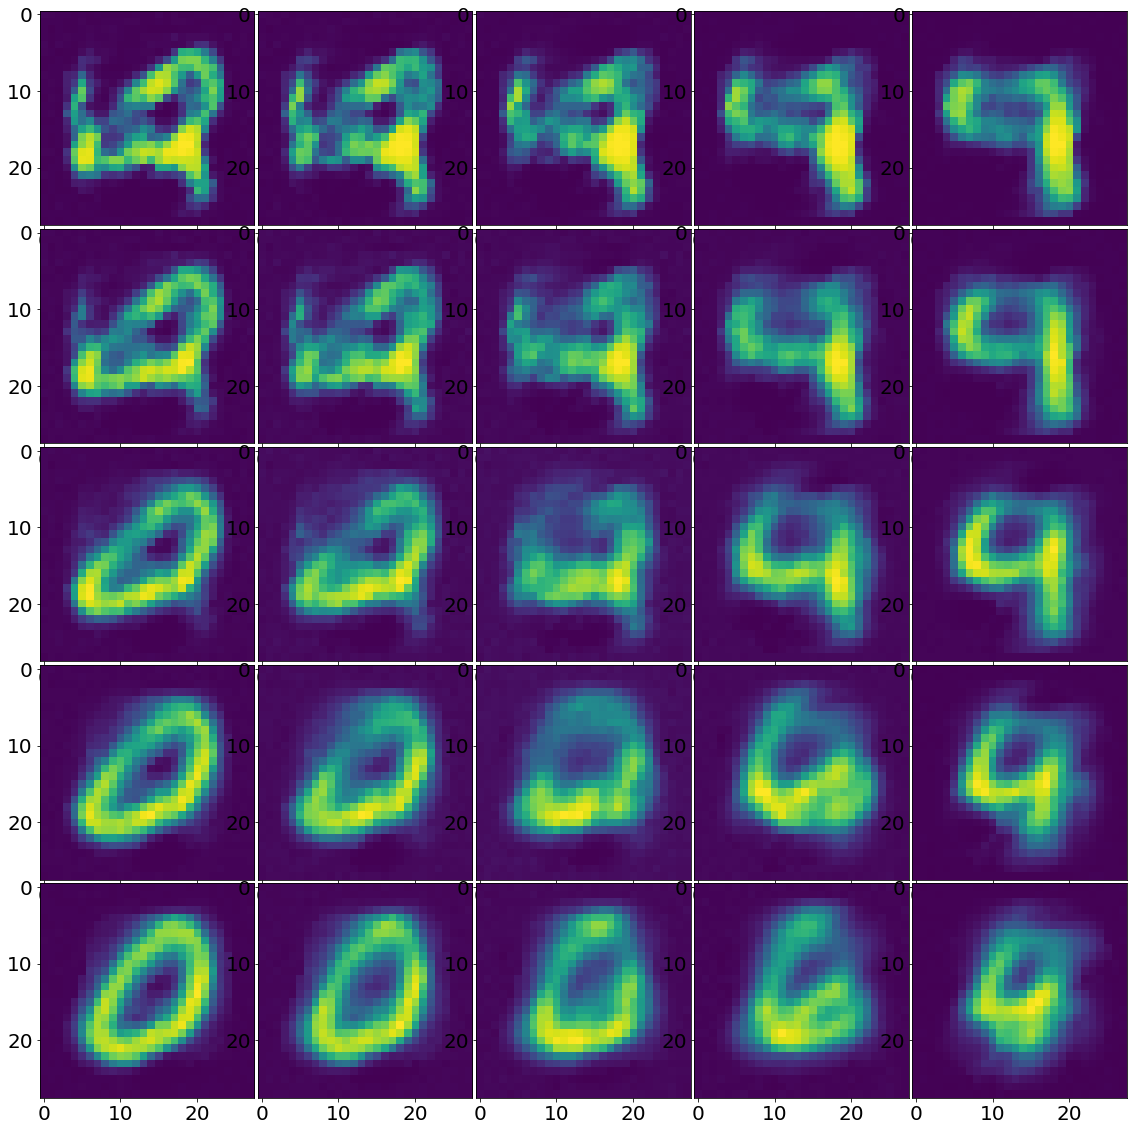

In [126]:
fig = plt.figure(figsize=(20,20));
grid = AxesGrid(fig, 111,  # similar to subplot(141)
                nrows_ncols=(5, 5),
                axes_pad=0.05,
                label_mode="0",
                )

for i in range(5):
    for j in range(5):
        x = (i - 2.5)
        y = (j-2.5)
        k = i + j*5
        z = np.atleast_2d(np.array([x,y]))
        out = model.decoder(Variable(torch.from_numpy(z)).float())
        out = to_img(out).data.numpy()
        im = grid[k].imshow(out[0,0,:,:], interpolation="nearest")